# Prima esercitazione: generazione di numeri casuali

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Stima di un semplice integrale ed errore associato

Per testare il generatore di numeri casuali, facciamo una stima dell'integrale
\begin{eqnarray}\langle r \rangle = \int_0^1 r dr = 0.5.\end{eqnarray}
La stima è fatta generando $10^6$ numeri casuali distribuiti uniformemente tra $0$ e $1$, che vengono raggruppati in $N=100$ blocchi da $100$ misure ciascuno.
Ciascun blocco si può considerare un esperimento.

Supponiamo che esperimenti successivi siano tra loro scorrelati. Per le misure ottenute in esperimenti successivi vale la legge dei grandi numeri, perciò all'aumentare del numero di esperimenti fatti è possibile ridurre l'incertezza sulla misura. Infatti questo si osserva nell'andamento di $\langle r\rangle$ e della sua incertezza all'aumentare del numero di blocchi usati per la misura, dal momento che 

\begin{eqnarray}
\sigma\propto\frac{1}{\sqrt{N}}\end{eqnarray}

Nel seguente grafico è riportata la misura di
\begin{eqnarray}
\langle r\rangle -0.5
\end{eqnarray}

in funzione del numero di esperimenti fatti.

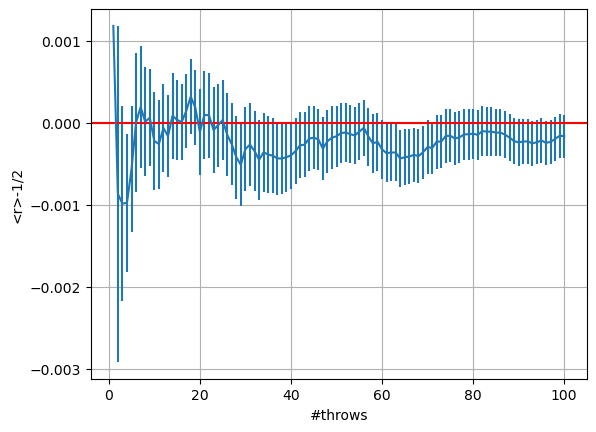

In [33]:
sum_prog,err_prog = np.loadtxt(fname = "risultati/rMedia.txt",usecols=(0, 1), unpack=True)

N = 100
x = np.arange(N)+1

plt.errorbar(x,sum_prog-1/2,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

In [34]:
sum_prog.size, err_prog.size

(100, 100)

Otteniamo all'ultimo passo 
\begin{eqnarray}
\langle r\rangle-0.5=7.2\cdot 10^{-4},
\end{eqnarray}
che è pienamente compatibile con l'errore associato $\sigma_{\langle r\rangle}=8.65\cdot 10^{-4}$.

Stimiamo ora l'errore associato alla misura di $\langle r\rangle$. Per fare ciò, misuriamo la deviazione standard di $r$ dal suo valor medio.
\begin{eqnarray}
\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12\end{eqnarray}
Per questa quantità vale lo stesso discorso fatto sopra.

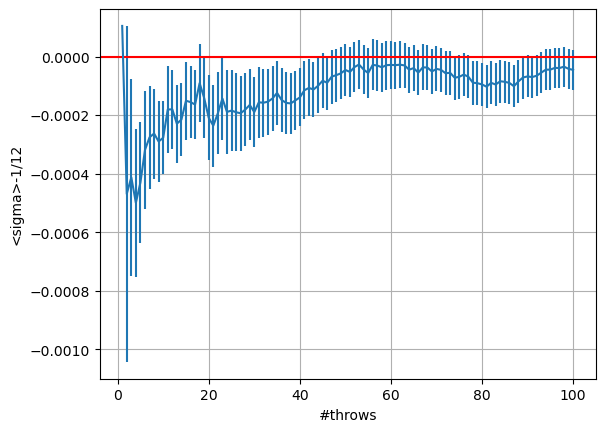

In [35]:
sum_prog,err_prog = np.loadtxt(fname = "risultati/rErrore.txt",usecols=(0, 1), unpack=True)

plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<sigma>-1/12')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

Otteniamo all'ultimo passo 
\begin{eqnarray}
\sigma^2-1/12=1.88\cdot 10^{-4},
\end{eqnarray}
che è pienamente compatibile con l'errore associato $\sigma_{\sigma^2}=2.33\cdot 10^{-4}$.

## Test di Pearson

Durante tutto il corso supporremo di usare numeri casuali distribuiti in modo uniforme. In realtà questi numeri sono pseudo-casuali, dato che in verità sono generati tramite un algoritmo deterministico, e quindi riproducibile. Tuttavia questo algoritmo è altamente sensibile alle condizioni iniziali. Per questo, dal nostro punto di vista i numeri così generati sono altamente scorrelati tra di loro, quindi a tutti gli effetti casuali.

Il test di Pearson permette di stimare la probabilità che i numeri generati siano distribuiti in modo uniforme.

Ho diviso l'intervallo $[0,1]$ in $M=100$ parti uguali e in ogni sottointervallo ho calcolato $n=10^3$ valori di $\chi^2$ secondo la formula

\begin{eqnarray}
\chi^2 &=& \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}\\
&=&\frac{1}{10}\sum_{i=1}^{100} ( n_i - 10 )^2
\end{eqnarray}

Il valore atteso per $\chi^2$ è il numero $M$ di gradi di libertà,
$$\langle\chi^2\rangle=M=100$$
e la varianza è $\sigma^2=2M$, pertanto
$$\sigma=\sqrt{2M}=\sqrt{200}=14.1$$

In [16]:
from scipy.stats import chisquare

chi = np.loadtxt("risultati/chiQuadro.txt", usecols=(0), unpack='true')
#chisquare(chi[0:9], f_exp=10)

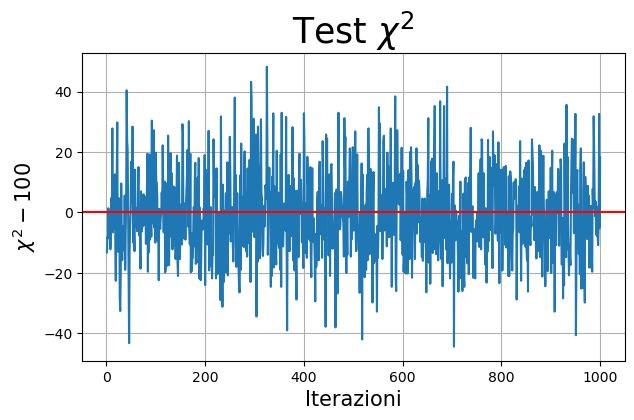

Chi^2 medio (atteso 100): 
99.25859999999999

Errore statistico (atteso 14.1): 
14.438935072920026


In [5]:
N = 1000
plt.figure(figsize=(7,4))
x = np.arange(N)+1 
chi = np.loadtxt("risultati/chiQuadro.txt", usecols=(0), unpack='true')
plt.plot(x, chi-100)
plt.xlabel('Iterazioni', fontsize = 15)
plt.ylabel('$\chi^2-100$', fontsize = 15)
plt.title("Test $\chi ^2$", fontsize =25)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print('Chi^2 medio (atteso 100): ')
print(np.mean(chi))
print('\nErrore statistico (atteso 14.1): ')
print(np.std(chi))

I valori di $\chi^2$ sono riportati nel seguente istogramma:

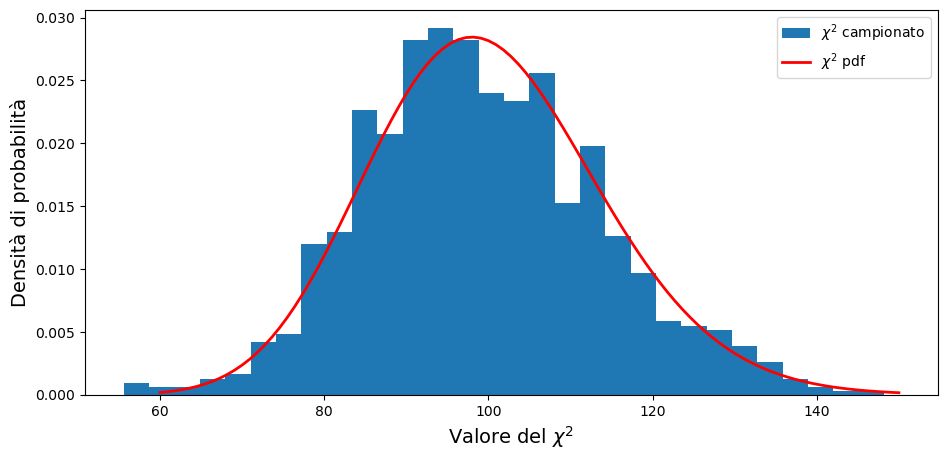

In [16]:
from scipy.stats import chi2

ChiVect=np.loadtxt("risultati/chiQuadro.txt")

plt.figure(figsize=(11,5))
x = np.linspace(60,150,100)

matplotlib.pyplot.hist(ChiVect,bins=30,density=True, label= "$\chi^2$ campionato")
plt.plot(x, chi2.pdf(x, 100), 'r-', lw=2, label='$\chi^2$ pdf')

plt.xlabel("Valore del $\chi^2$", fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)

plt.legend()


#### Osserviamo un buon accordo tra il chi quadro campionato e la sua distribuzione prevista.







# Altre distribuzioni di probabilità

È possibile costruire altre distribuzioni di probabilità tramite il metodo dell'inversione della cumulativa, introdotto da Ulam.
Considero una generica $p_x(x)$ e una cumulativa $y=F_x(x)$. Come è distribuita la cumulativa?
\begin{eqnarray}
p_y(y)&=&p_x(x)~\left(\frac{dy}{dx}\right)^{-1}\\
&=&p_x(t)~\left(\frac{dF_x(x)}{dx}\right)^{-1}\\
&=&p_x(x)~p_x(x)^{-1}\\
&=&1
\end{eqnarray}
pertanto $y$ è distribuita in modo uniforme tra $0$ e $1$, a prescindere da quale sia $p_x$. Se $F_x$ è nota e invertibile, posso usarla per il campionamento: una volta campionata la variabile uniforme $y$, la variabile
$$x=F_x^{-1}(y)$$
è una variabile casuale distribuita come
$$p_x(x)=dF_x(x)/dx$$


Ho esteso la classe Random per consentire l'estrazione di numeri con diverse distribuzioni di probabilità:

1. **Lorenziana**

$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$

la cumulativa è:

\begin{eqnarray}F_x(x)&=&\int_{-\infty}^x\frac{1}{\pi}\frac{\Gamma}{\Gamma^2+x^2}dx\\
&=&\frac{1}{\pi}\text{atan}\frac{x}{\Gamma}+\frac{1}{2}\end{eqnarray}

e pertanto
$$x = \mu + \Gamma \tan(\pi(y - 0.5))$$ dunque $x$ è distribuito secondo una lorenziana se $y$ ha distribuzione uniforme in $[0,1]$

2. **Esponenziale**

$$p(x)=\lambda e^{-\lambda x}$$

Si ha

\begin{eqnarray}F_x(x)&=&\int_0^x\lambda e^{-\lambda x'}dx'\\
&=& 1-e^{-\lambda x}\end{eqnarray}
e pertanto

$$x=-\frac{1}{\lambda} \ln(1 - y)$$
dunque $x$ è distribuito esponenzialmente se $y$ ha distribuzione uniforme in $[0,1]$.
È possibile inoltre implementare il generatore gaussiano come segue:

3. **Gaussiana**

Conviene considerare una gaussiana in due dimensioni:
$$p(r,\theta)=\frac{r}{\sigma^2}e^{-r^2/2\sigma^2}$$

dobbiamo produrre un valre $r$ per questa coordinata ogni volta che il generatore casuale produre un numero $\rho$ tale che

\begin{eqnarray}
\rho&=&F_r(r)\\
&=&\int_0^r\frac{r'}{\sigma^2}e^{-r^2/2\sigma^2}dr'\\
&=&1-e^{-r^2/2\sigma^2}\end{eqnarray}

pertanto,
$$r=-(2\sigma^2\ln(1-\rho))^{1/2}$$


# Legge dei grandi numeri
Considero la distribuzione di probabilità della media campionaria

$$y_N=\frac{1}{N}\sum_{i=1}^Nx_i$$

nel limite in cui $N\rightarrow\infty$, la media campionaria tende alla media

$$\mu=\langle x\rangle=\int x P(x)~dx$$

La legge dei grandi numeri stabilisce che per grandi $N$, $$P_N(x)\sim\delta(x-\mu)$$

Supponiamo finita la varianza
\begin{eqnarray}
\sigma^2&=&\langle x^2\rangle-\mu^2\\
&=&\int x^2~P(x)dx-\mu^2\\
&=&\int (x-\mu)^2~P(x)dx\end{eqnarray}
si ha il lemma di Tchebiscev:
\begin{eqnarray}
\sigma^2&=&\int (x-\mu)^2~P(x)dx\\
&>&\int_{|x-\mu|>t}(x-\mu)^2~P(x)dx\\
&>&t^2\int_{|x-\mu|>t}~P(x)dx
\end{eqnarray}
si ha quindi che
$$\int_{|x-\mu|>t}~P(x)dx<\Bigg(\frac{\sigma}{t}\Bigg)^2$$

Ora, osserviamo che la varianza della somma di variabili indipendenti è uguale alla somma delle varianze: a causa dell'indipendena $\langle ab\rangle=\langle a\rangle\langle b\rangle$ e quindi
$$\langle (a+b)^2\rangle=\langle a^2\rangle+2\langle a\rangle\langle b\rangle+\langle b^2\rangle$$
che raggruppando i termini è ancora uguale a
$$=\langle(a-\langle a\rangle)^2\rangle+\langle(b-\langle b\rangle)^2\rangle+\langle a+b\rangle^2$$
sposetando l'ultimo termine a sinistra dell'uguale, si dimostra la tesi. Generalizzando il ragionamento ad $N$ variabili indipendenti si otiene che la varianza della quantità $N~y_N$ è data da $N\sigma^2$ mentre il suo valor medio è ovviamente $N\mu$. Il lemma di Tchebiscev implica quindi che la probabilità dell'evento $(N|y_N-\mu|>t)$ è minore di $\frac{\sigma^2N}{t^2}$.

Scegliendo $t=N\epsilon$ si ha per la probabilità dell'evento $(|y_N-\mu|>\epsilon)$ è certamente più piccola od uguale a $\frac{\sigma^2}{N\epsilon^2}$ e questa stima ad $\epsilon$ fissato (piccolo o grande a piacere) tende a zero quando $N$ tende ad $\infty$.

Va notato che succede spesso di attribuire erroneamente alla legge dei grandi numeri conseguenze che in realtà non ne derivano. Poniamo ad esempio al lettore due domande, e lo invitiamo a dedurne la risposta. Due avversari giocano $M$ volte a testa e croce, con sequenze di $E$ eventi (un punto parziale è vinto da chi ha più teste dopo $E$ lanci, e la partita è vinta da chi ha più punti parziali dopo $M$ sequenze): ci si può aspettare, secondo la legge dei grandi numeri, che per $N$ e $M$ grandi ci sia stato in media un numero molto simile di teste e croci? Consideriamo invece una sola sequenza molto lunga, vinta dal giocatore che aveva scelto testa: possiamo aspettarci, dalla legge dei grandi numeri, che in media, in questa sequenza, si sia avuto un numero di teste molto simile a quello delle croci? Ovvero, ci si può aspettare, nel primo e nel secondo caso, che il giocatore che ha vinto la sfida sia stato in testa mediamente per la metà del tempo?

# Teorema centrale del limite

<img src="gauss.gif">

 **Teorema centrale del limite**. Secondo questo teorema, quando le variabili casuali vengono mediamente estratte insieme, le medie tendono a distribuirsi come una gaussiana centrata sul valore vero, indipendentemente dalla distribuzione da cui sono estratte, a condizione che la distribuzione abbia una varianza finita.

In altre parole, se estraiamo una variabile casuale con una distribuzione, ad esempio esponenziale, e costruiamo direttamente l'istogramma delle estrazioni, otteniamo una distribuzione esponenziale. Tuttavia, se estraiamo le variabili a gruppi e ne calcoliamo la media per ciascun gruppo, man mano che la dimensione del gruppo aumenta, la distribuzione delle medie converge a una distribuzione gaussiana.

Il *teorema centrale del limite* afferma che se consideriamo $N$ variabili indipendenti $x_i$ (sotto l'ipotesi che $\mu$ e $\sigma^2$, definiti nella sezione precedente, siano entrambi finiti), la distribuzione di probabilità $c_N(w)$ della variabile

$$w=\frac{1}{N^{1/2}}\sum_{i=1}^N(x_i-\mu)$$
nel limite $N\rightarrow\infty$ tende ad una distribuzione gaussiana con varianza $\sigma$, ovvero
$$\lim_{N\rightarrow\infty}c_N(w)=P_\infty(w)=\frac{e^{-w^2/2\sigma^2}}{(2\pi\sigma^2)^{1/2}}$$

Ricordiamo che la legge dei grandi numeri implica che nel limite $N\rightarrow\infty$ la distribuzione di probabilità della variabile $\lambda=N^{1/2}w$ tende a $\delta(\lambda)$. Assumeremo nel seguito, senza perdere in generalità, che $\mu=0$ ($\mu$ può essere messo a zero mediante una semplice ridefinizione della variabile $x$, ovvero usando una nuova variabile $y=x-\mu$).
Inichiamo con $\tilde{P}(q)$ la trasformata di Fourier della distribuzione di probabilità $P(x_i)$ della variabile aleatoria elementare $x_i$ (siamo sotto l'ipotesi che le $x_i$ siano tutte distribuite secondo la stessa $P(x)$):
$$\tilde{P}(q)=\int e^{iqx}~P(x)dx$$
Procediamo per passi, e definiamo la variabile
$$z=\sum_{i=1}^Nx_i$$ uguale cioè a $wN^{1/2}$. Diciamo $d_N(z)$ la distribuzione di probabilità della variabile $z$. Applicando ripetutamente il teorema della convoluzione si trova che la trasformata di Fourier di $d_N(z)$ è data da:
$$\tilde{d}_N(q)=\tilde{P}(q)^N$$
Cambiando ora variabile si vede che la trasformata di Fourier di $c_N(w)$ è data da:
$$\tilde{c}_N(q)=\tilde{P}\Bigg(\frac{q}{N^{1/2}}\Bigg)^N=e^{N\ln(\tilde{P}(q/N^{1/2}))}$$
dove il fattore $N^{1/2}$ viene appunto dalla normalizzazione della variabile $w$. Il risultato precedente implica immediatamente che la somma di variabili gaussiane è ancora distribuita gaussianamente. 

Tutti i punti dove $|\tilde{P}(q)|<1$ danno un contributo che va a zero esponenzialmente con $N$. Nel limite $N\rightarrow\infty$ sopravvivono solo i punti dove $|\tilde{P}(q)|=1$ e i loro intorno. Consideriamo per il momento il contributo a $q=0$, infatti $\tilde{P}(0)=1$, conseguenza della normalizzazione della probabilità. Nel limite di $N$ grande possiamo sviluppare
\begin{eqnarray}
N\ln(\tilde{P}(q/\sqrt{N}))&=&N\ln(\int e^{iqx/\sqrt{N}}~P(x)dx\\
&=&N\ln \Bigg(1-\frac{q^2\sigma^2}{2N}+O\Bigg(\frac{q^3m_3}{N^{3/2}}\Bigg)\Bigg)\end{eqnarray}
dato che abbiamo posto $\mu=0$. Con $m_3$ abbiamo indicato il momento terzo della distribuzione di probabilità $P(x)$, e continuando lo sviluppo otteniamo
$$N\ln(\tilde{P}(q/\sqrt{N}))=-\frac{q^2\sigma^2}{2}+O\Bigg(\frac{q^3\sigma^3S}{\sqrt{N}}\Bigg)$$
dove $S$ è la torsione (skewness) definita per $\mu=0$ da
$$S=\frac{\langle x^3\rangle}{\langle x^2\rangle^{3/2}}$$
La torsione è nulla per una distribuzione di probabilità simmetrica intorno a $x=\mu$.

Quindi per $N$ grande
$$\tilde{c}_N(q)=e^{-q^2\sigma^2/2}+O(N^{-1/2})$$
e mediante trasformata inversa di Fourier (notando che la trasformata di Fourier di una funzione gaussiana è ancora una funzione gaussiana)

$$c_N(w)=\frac{e^{-w^2/2\sigma^2}}{\sqrt{2\pi\sigma^2}}+O(N^{-1/2})$$
Questo prova il teorema centrale del limite.
Le correzioni alla distribuzione asintotica gaussiana sono di ordine $N^{-1/2}$ nell'ipotesi in cui $m_3$ sia finito e non nullo.

Vogliamo ora ampliare le funzionalità del generatore di numeri pseudo-casuali e confermare la validità del teorema centrale del limite.
Per verificare graficamente i risultati, riempiamo 4 istogrammi per ciascuna delle 3 distribuzioni. Ogni istogramma raccoglie un certo numero di realizzazioni estratte secondo la relativa distribuzione.

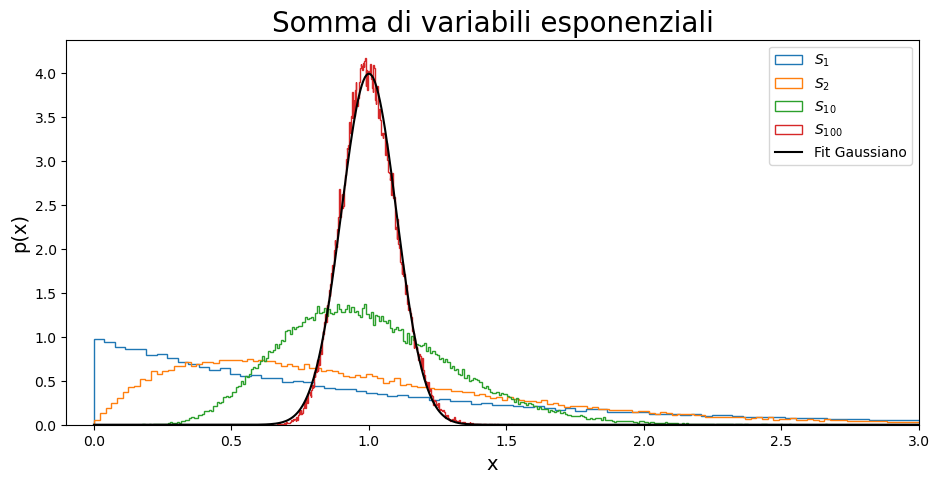

In [28]:
from scipy.stats import norm  

index = ["1","2","10","100"]

x = np.linspace(0.,3,500)

plt.figure(figsize=(11,5))

for i in range (0,4):
    LCTexp = np.loadtxt("risultati/outfileLCTexp"+index[i]+".txt")
    matplotlib.pyplot.hist(LCTexp,bins=350, label="$S_{"+index[i]+"}$", density=True, histtype='step')

plt.plot(x, norm.pdf(x, 1, 1/10), 'black', lw=1.5, label='Fit Gaussiano',)

plt.title("Somma di variabili esponenziali", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel('p(x)', fontsize=14) 
plt.xlim(-0.1,3)

plt.legend()   
plt.show()  


Dal grafico è evidente che all'aumentare del numero di variabili sommate, le distribuzioni diventano sempre più simmetriche. Per dimostrare la validità Teorema Centrale del Limite, ho disegnato il fit gaussiano nel caso di maggiore somiglianza tra le distribuzioni. Ricordo che questa è un'approssimazione del teorema, dato che la somma delle variabili casuali ha un numero finito di termini.

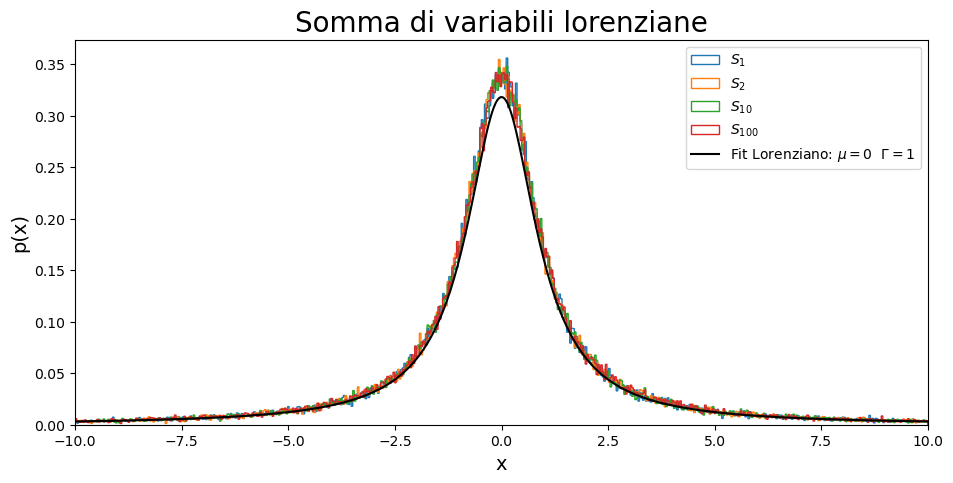

In [30]:
from scipy.stats import cauchy

index = ["1","2","10","100"]
x = np.linspace(-10,10,500)

plt.figure(figsize=(11,5))

for i in range (0,4):
    LCTexp = np.loadtxt("risultati/outfileLCTlor"+index[i]+".txt")
    matplotlib.pyplot.hist(LCTexp,range = (-10,+10),bins=550, label="$S_{"+index[i]+"}$", density=True, histtype='step')

y = cauchy.pdf(x,0,1)
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Lorenziano: $\mu=0$  $\Gamma=1$")

plt.title("Somma di variabili lorenziane", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel('p(x)', fontsize=14) 
plt.xlim(-10,10)

plt.legend()   
plt.show()  

Dato che la distribuzione di Lorentz ha una varianza non finita, il Teorema Centrale del Limite stabilisce che la distribuzione risultante sarà ancora una Lorenziana. Poiché tutte le distribuzioni hanno le stesse proprietà (media nulla e varianza infinita), sono completamente sovrapponibili con una Lorenziana centrata nell'origine e con larghezza unitaria.

# Stima di $\pi$ con l'esperimento di Buffon


<div style="text-align:center;">
    <img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedle_700.svg" alt="Image" style="display:inline-block;">
</div>


Georges-Louis Leclerc, conte di Buffon, nel 1977 stimò che la probabilità che un ago atterri su una riga è
\begin{eqnarray}
P=\frac{2L}{\pi d}
\end{eqnarray}
Successivamente Laplace nel 1820 suggerì che possiamo stimare $\pi$ misurando il rapporto tra il numero di aghi che atterra su una riga e il numero totale di aghi, tramite la formula 
\begin{eqnarray}
\pi=\frac{2L}{Pd}=\frac{2L}{d}\lim_{N_\text{lanci}\rightarrow\infty}\frac{N_\text{lanci}}{N_\text{colpiti}}
\end{eqnarray}


<div style="text-align:center;">
    <img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedleTosses_825.svg" alt="Image" style="display:inline-block;">
</div>




#### È importante misurare $\pi$ senza utilizzarlo, neanche implicitamente richiamando funzioni trigonometriche. Per indicare la testa e la coda dell'ago è sufficiente generare casualmente due punti di distanza fissa in un quadrato.

## Eseguo la misura di $\pi$ 

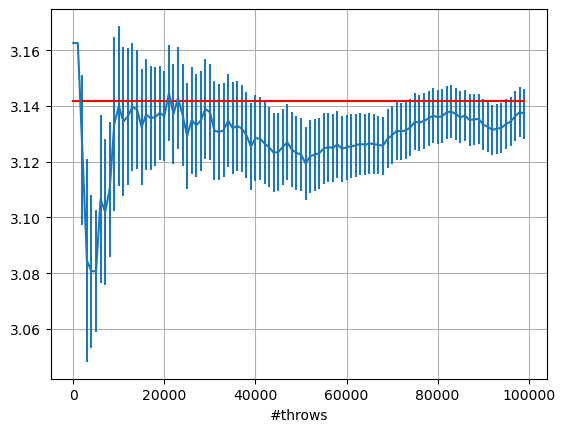

In [33]:
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block (=experiment)
d = 1.2
l=1.

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L                  # Number of throws = block * (Number of throws in each block)

sum_prog,err_prog = np.loadtxt(fname = "risultati/buffon.txt",unpack=True)

pigreco= (2./sum_prog)*(l/d)
errPi = err_prog *pigreco/sum_prog

pi_array = np.full(N, np.pi)

plt.errorbar(x,pigreco,yerr=errPi)
plt.xlabel('#throws')
plt.plot(x, pi_array, label='pi', color="red")
plt.grid(True)
plt.show()


### Errori statistici
Come abbiamo imparato, spesso è semplice stimare l'errore statistico in una quantità misurata, poiché l'assunzione che l'errore sia statistico (cioè che derivi da deviazioni casuali nel valore misurato della quantità) implica (Teorema del Limite Centrale) che possiamo stimare il valore vero prendendo la media di diverse misurazioni, e che l'errore su tale stima è semplicemente l'errore sulla media.

Dunque, se stiamo eseguendo la simulazione del modello di Ising descritta nelle slide precedenti, e facciamo $N$ misurazioni della magnetizzazione del sistema durante una particolare esecuzione, allora la nostra migliore stima della vera media termica della magnetizzazione è la media di quelle $N$ misurazioni e la nostra migliore stima della deviazione standard sulla media è data da:

$$
\sigma = \frac{1}{N-1} \left( \langle m^2 \rangle - \langle m \rangle^2 \right)
$$


Questa espressione assume che i nostri campioni della magnetizzazione (o meglio le $N$ configurazioni degli spin in cui abbiamo trovato il sistema nelle nostre $N$ misurazioni) siano statisticamente indipendenti, cosa che in generale non è vera.

Come abbiamo detto, è normale campionare a intervalli inferiori al tempo di correlazione, il che significa che i campioni successivi saranno in generale correlati.

Una soluzione semplice e di solito adeguata a questo problema è utilizzare il valore dato da $n = \frac{t_{\text{max}}}{2 t_c}$ (il numero di campioni statisticamente indipendenti in $t_{\text{max}}$) piuttosto che il numero effettivo di campioni presi:

$$
\sigma \approx \frac{2 t_c}{t_{\text{max}}} \left( \langle m^2 \rangle - \langle m \rangle^2 \right)
$$

Ci sono alcuni casi in cui non è possibile o non è semplice stimare l'errore in una quantità usando il metodo diretto descritto qui.

Questo accade quando il risultato che vogliamo non è semplicemente la media di una misurazione ripetuta molte volte nel corso della simulazione, come per esempio la magnetizzazione, ma è invece derivato in modo più complesso dalle misurazioni che facciamo durante l'esecuzione.

In questi casi, ci sono altri metodi di stima dell'errore più generali che si prestano a questo problema, sebbene sia chiaro che sono applicabili a quasi qualsiasi quantità che può essere misurata in una simulazione Monte Carlo.


L'analisi della varianza (ANOVA) è un insieme di modelli statistici e delle relative procedure di stima (come la "variazione" tra e all'interno dei gruppi) utilizzati per analizzare le differenze tra le medie. L'ANOVA è stata sviluppata dallo statistico Ronald Fisher. L'ANOVA si basa sulla legge della varianza totale, in cui la varianza osservata in una particolare variabile è suddivisa in componenti attribuibili a diverse fonti di variazione. Nella sua forma più semplice, l'ANOVA fornisce un test statistico per determinare se due o più medie di popolazione sono uguali, generalizzando quindi il test t a più di due medie. In altre parole, l'ANOVA viene utilizzata per testare la differenza tra due o più medie.

### Storia

Sebbene l'analisi della varianza abbia raggiunto la sua maturità nel XX secolo, secondo Stigler, i suoi antecedenti risalgono a secoli prima. Questi includono il test delle ipotesi, la suddivisione delle somme dei quadrati, le tecniche sperimentali e il modello additivo. Laplace eseguiva test delle ipotesi negli anni 1770. Intorno al 1800, Laplace e Gauss svilupparono il metodo dei minimi quadrati per combinare le osservazioni, migliorando i metodi allora utilizzati in astronomia e geodesia. Ciò ha anche avviato molti studi sui contributi alle somme dei quadrati. Laplace sapeva come stimare una varianza da una somma dei quadrati residuale (piuttosto che totale). Entro il 1827, Laplace utilizzava i metodi dei minimi quadrati per affrontare problemi di ANOVA riguardanti le misurazioni delle maree atmosferiche. Prima del 1800, gli astronomi avevano isolato gli errori osservativi derivanti dai tempi di reazione (la "equazione personale") e avevano sviluppato metodi per ridurre tali errori. Le metodologie sperimentali utilizzate nello studio dell'equazione personale furono successivamente accettate dal nascente campo della psicologia, che sviluppò forti metodi sperimentali (completamente fattoriali) a cui furono presto aggiunti randomizzazione e cieco. Una spiegazione eloquente e non matematica del modello degli effetti additivi era disponibile già nel 1885.

**Ronald Fisher introdusse il termine varianza e propose la sua analisi formale** in un articolo del 1918 sulla genetica delle popolazioni teorica, *The Correlation Between Relatives on the Supposition of Mendelian Inheritance*. La sua prima applicazione dell'analisi della varianza all'analisi dei dati fu pubblicata nel 1921 in *Studies in Crop Variation I*. Questo lavoro divideva la variazione di una serie temporale in componenti che rappresentavano cause annuali e lento deterioramento. Il successivo lavoro di Fisher, *Studies in Crop Variation II*, scritto con Winifred Mackenzie e pubblicato nel 1923, studiava la variazione nella resa tra parcelle seminate con diverse varietà e sottoposte a diversi trattamenti fertilizzanti. L'analisi della varianza divenne ampiamente conosciuta dopo essere stata inclusa nel libro di Fisher del 1925, *Statistical Methods for Research Workers*.


# Medie a blocchi

Il metodo più semplice dei nostri metodi generali di stima dell'errore è il metodo dei blocchi. L'idea è di prendere le misurazioni di una quantità effettuate durante la simulazione e dividerle in diversi gruppi, o blocchi. Poi calcoliamo la media separatamente per ciascun blocco, e la dispersione dei valori da un blocco all'altro ci dà una stima dell'errore.

Per vedere come funziona, supponiamo di fare $M$ misurazioni di una quantità $g$ durante la nostra simulazione del modello di Ising, e poi di dividerle in $N$ gruppi di $L = \frac{M}{N}$ misurazioni. Possiamo valutare una media specifica, $g_i$, per ciascun gruppo e poi trovare la media di quei risultati esattamente come abbiamo fatto per la magnetizzazione sopra:

$$
g = \frac{1}{N} \sum_{i=1}^{N} g_i = \frac{1}{N} \frac{1}{L} \sum_{j=(i-1)L+1}^{iL} g(\mu_j)
$$

L'errore sulla media è dato di nuovo da:

$$
\sigma_g = \frac{1}{N-1} \left( \langle g^2 \rangle - \langle g \rangle^2 \right)
$$

eccetto che $M$ è ora sostituito dal numero $N$ di blocchi.

<img src="blocchi.png" width=70%>

**Il metodo funziona perché, anche se le $M$ misurazioni sono correlate, la media nei blocchi è non correlata se i blocchi sono abbastanza grandi.**

Bisogna trovare la lunghezza dei blocchi tale che le medie tra i blocchi siano statisticamente indipendenti; quando questo è il caso, si può applicare il Teorema del Limite Centrale e questo dà la formula standard.

Notare che aumentando il numero di stime nei blocchi $L = \frac{M}{N}$ (con $M$ fissato), ci si avvicina al vero errore statistico dovuto all'uso di una catena di Markov; una volta raggiunto questo limite, aumentando ulteriormente $L$ non si dovrebbe più influenzare l'errore; infatti il Teorema del Limite Centrale è soddisfatto e si sta cambiando la distribuzione di $g_i$ (che è più stretta) ma non $\sigma_g$ poiché $N$ diventa più piccolo.

$$
\sigma_g = \frac{1}{N-1} \left( \frac{1}{N} \sum_{i=1}^{N} g_i^2 - \left( \frac{1}{N} \sum_{i=1}^{N} g_i \right)^2 \right)
$$

Il blocking riduce la variabilità inspiegabile. Il suo principio si basa sul fatto che la variabilità ineliminabile (ad esempio, la necessità di due lotti di materia prima per produrre un contenitore di un prodotto chimico) viene confusa o distorta con un'interazione di ordine superiore per eliminarne l'influenza sul prodotto finale. Le interazioni di ordine superiore sono di solito di minore importanza (si pensi al fatto che la temperatura di un reattore o il lotto di materie prime è più importante della combinazione dei due - questo è particolarmente vero quando sono presenti più fattori (3, 4, ...)); quindi è preferibile confondere questa variabilità con l'interazione di ordine superiore.

# Statistica inferenziale

####  Stima puntuale
##### Stima della media

Ricordiamo che un modello statistico è una famiglia di leggi di variabili aleatorie (discrete o continue) dipendenti da uno o più parametri che possono variare in opportuni insiemi. In simboli:

$$ \{ f(x; \theta) | \theta \in \Theta \} $$

dove $\theta$ denota in generale un vettore di parametri.

**Esempi:**
1. **Modello di Bernoulli**:
   $$ \{ p(x; \pi) = \pi \delta_1(x) + (1-\pi) \delta_0(x) | \pi \in (0,1) \} $$
2. **Modello esponenziale**:
   $$ \{ f(x; \lambda) = \lambda e^{-\lambda x} \mathbf{1}_{(0, \infty)}(x) | \lambda \in (0, +\infty) \} $$
3. **Modello normale**:
   $$ \{ f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} | (\mu, \sigma) \in \mathbb{R} \times (0, +\infty) \} $$
4. **Modello gamma**:
   $$ \{ f(x; \alpha, \lambda) = \frac{\lambda^\alpha x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)} \mathbf{1}_{(0, \infty)}(x) | (\alpha, \lambda) \in (0, +\infty) \times (0, +\infty) \} $$

Nei primi due esempi c'è un solo parametro $\theta$, mentre nel terzo e quarto esempio $\theta$ è un vettore.

Un campione casuale di ampiezza $n$ estratto da una popolazione con densità $f(x; \theta)$ è una n-upla di variabili aleatorie indipendenti $(X_1, X_2, ..., X_n)$, ciascuna con legge $f(x; \theta)$. Una *statistica* è una variabile aleatoria $$T = g(X_1, X_2, ..., X_n)$$, ossia una funzione delle osservazioni del campione. (Perciò anche la legge di $T$ dipende dal parametro $\theta$). Occorre rendersi conto del fatto che quando si scrivono espressioni del tipo $$P(\overline{X}_n>3),\quad P(1<X_1^2 + X_2^2 + ... + X_n^2 <4),\quad\text{ecc.}$$, il valore della probabilità calcolata dipende anch'esso dal valore del parametro $\theta$. Per sottolineare questo fatto, scriveremo talvolta $$P^\theta(\overline{X}_n>3)$$, ecc.

**Esempio 2:** Sia $(X_1, X_2, ..., X_{10})$ un campione casuale estratto da una popolazione bernoulliana di parametro $\pi$. Allora
$$ \sum_{i=1}^{10} X_i \sim \text{Binomiale}(10, \pi) $$
$$P^\pi\Bigg(\overline{X}_{10}=\frac{3}{10}\Bigg)=
P^\pi\Bigg(\sum_{i=1}^{10}X_i=3\Bigg)=\binom{10}{3}\pi^3(1-\pi)^7$$
La scrittura $$P_{\pi=0.5}(X_{10} = 3)$$ significa: "La probabilità che $\sum_{i=1}^{10} X_i$ sia uguale a 3, nell'ipotesi che il valore vero del parametro \(\pi\) sia 0.5, è 0.117".

Analogo significato ha la scrittura $E_\theta[T]$, se $T$ è una statistica.

Se $r(\theta)$ è una funzione del parametro (o dei parametri), cioè $r: \Theta \rightarrow \mathbb{R}$, uno stimatore di $r(\theta)$ è una statistica $T$ che viene usata per stimare il valore vero di $r(\theta)$. Lo stimatore $T$ si dice non distorto se $E_\theta[T] = r(\theta)$ per ogni $\theta \in \Theta$. Uno stimatore non distorto si dice consistente se, quando l'ampiezza $n$ del campione tende a $\infty$, $\text{Var}_\theta(T) \rightarrow 0$.

**Esempio 3:** La media campionaria come stimatore del valore atteso. Se $(X_1, X_2, ..., X_n)$ è un campione casuale estratto da una popolazione con densità $f(x; \theta)$, dotata di valore atteso $\mu$ e varianza $\sigma^2$ finiti, si ha:
$ E_\theta[\overline{X}_n] = \mu \quad \text{e} \quad \text{Var}_\theta(\overline{X}_n) = \frac{\sigma^2}{n} $

D'altro canto, il valore atteso e la varianza saranno funzioni dei parametri:
$$ \mu = g(\theta) \quad \text{e} \quad \sigma^2 = h(\theta) $$
Queste relazioni dicono che $\overline{X}_n$ è uno stimatore corretto e consistente di $g(\theta)$.

Negli Esempi 1, a-d, questo significa esplicitamente che:
- a. $\overline{X}_n$ è uno stimatore corretto e consistente di $g(\pi) = \pi$;
- b. $\overline{X}_n$ è uno stimatore corretto e consistente di $g(\lambda) = \frac{1}{\lambda}$;
- c. $\overline{X}_n$ è uno stimatore corretto e consistente di $g(\mu, \sigma) = \mu$;
- d. $\overline{X}_n$ è uno stimatore corretto e consistente di $g(\alpha, \lambda) = \frac{\alpha}{\lambda}$.

Abbiamo osservato che la proprietà di correttezza è piuttosto "instabile" rispetto alla composizione di funzioni: ad esempio, nel caso b, $\overline{X}_n$ è uno stimatore corretto di $\frac{1}{\lambda}$, ma $1/\overline{X}_n$ non è uno stimatore corretto di $\lambda$.


Nell'esempio b., ho usato il fatto che 
$\lambda\int_0^\infty te^{-\lambda t}dt=-\lambda\partial_\lambda\int_0^\infty e^{-\lambda t}~dt=\frac{1}{\lambda}$

Nell'esempio c., ho usato il fatto che
\begin{eqnarray}
\langle e^{\lambda x}\rangle&=&\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty e^{\lambda x}e^{-(x-\mu)^2/2\sigma^2}~dx\\
&=&e^{\lambda\mu}e^{\lambda^2\sigma^2/2}
\end{eqnarray}
pertanto
$$\langle x\rangle=(\partial_\lambda\langle e^{\lambda x}\rangle)_{\lambda=0}
=\mu$$
e posso usare la generatrice dei momenti connessi o cumulanti (sarebbe l'energia libera)
$$\ln\langle e^{\lambda x}\rangle=\lambda\mu +\frac{\lambda^2\sigma^2}{2}$$
la cui derivata prima mi dà per il primo momento $\mu$, e la derivata seconda mi dà per il secondo momento $\sigma^2$.

#### Osservazione 4. Stima puntuale e stima per intervalli

L'utilizzo di opportune statistiche per stimare il valore di un parametro prende il nome di **stima puntuale**, ad indicare che, una volta effettuato il campionamento, viene fornito un unico valore numerico (un "punto") come stima del parametro incognito. Ad esempio, se estraendo un campione di 20 pezzi da un lotto numeroso troviamo che 3 pezzi sono difettosi, stimeremo pari a 3/20 = 0.15 la proporzione di pezzi difettosi nel lotto.

Naturalmente, per quanto "rappresentativo" sia il campione, sarebbe eccessivamente ottimistico pensare di aver "indovinato" il valore vero del parametro con precisione assoluta. Piuttosto, ciò che pensiamo è che il valore vero del parametro sarà abbastanza vicino a 0.15. Un modo più preciso per esprimere questo concetto è fornire un intervallo del tipo 0.15 ± 0.001, ad esempio, entro il quale riteniamo che il parametro possa trovarsi. Questo è il punto di vista adottato in quella branca della statistica inferenziale che è la **stima per intervalli**.

####  Stima della varianza. Varianza campionaria

Un problema che sorge in modo naturale negli esempi c e d è quello di trovare uno stimatore corretto e consistente di $\sigma^2 = h(\theta)$. Supponiamo, ad esempio, di voler stimare la varianza $\sigma^2$ di una popolazione con distribuzione normale $N(\mu, \sigma^2)$ in base alle osservazioni. In statistica descrittiva, abbiamo introdotto la varianza campionaria. 
$$\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x}_n)^2$$
Pertanto, sembra naturale stimare $\sigma^2$ con lo stimatore

$$ \textcolor{red}{T_1= \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X}_n)^2 }$$

Si osservi che, quando si ha a che fare con una legge che dipende da due parametri incogniti $(\theta_1, \theta_2)$, la stima di $\theta_1$ è un problema diverso a seconda che si conosca già il valore dell'altro parametro $\theta_2$ oppure no. Ad esempio, $S^2$ permette di stimare $\sigma^2$ senza conoscere nemmeno $\mu$ (implicitamente, $\mu$ viene stimato da $\overline{X}_n$). Se però conoscessimo il valore vero di $\mu$, potremmo utilizzare la statistica:

$$ T_2 = \frac{1}{n} \sum_{i=1}^n (X_i - \mu)^2 $$

che, intuitivamente, dovrebbe dare una stima migliore di $\sigma^2$, visto che utilizza un'informazione in più (il valore vero di $\mu$). Si noti che se $\mu$ è incognito, $T_2$ non è una statistica, ed è perciò inutilizzabile come stimatore.

Vediamo ora se gli stimatori proposti sono corretti e consistenti.


**dimostro che $T_1$ è un estimatore della varianza**: se $X_1,\ldots,X_n$ sono variabili casuali identicamente distribuite, con media $\langle 
X\rangle=\mu$ e varianza $\langle X^2\rangle -\langle X\rangle^2=\sigma^2$,

$$ \bar{X}_n = \frac{X_1 + \cdots + X_n}{n} $$
con $\langle X_i \rangle = \langle X \rangle$ per ogni $i$ (identicamente
distribuite).
\begin{eqnarray}
  \langle \bar{X}_n \rangle & = & \frac{1}{n} \langle X_1 + \cdots + X_n
  \rangle\\
  & = & \langle X \rangle\\
  \langle X_1  \bar{X}_n \rangle & \neq & \langle X_1 \rangle \langle
  \bar{X}_n \rangle\\
  &  & \\
  n \langle X_i  \bar{X}_n \rangle & = & \langle X_i  (X_1 + \cdots + X_n)
  \rangle\\
  & = & \langle X_i^2 \rangle + \langle X_i \rangle \langle X_1 \rangle +
  \cdots + \langle X_i \rangle \langle X_n \rangle\\
  & = & \langle X^2 \rangle + (n - 1) \langle X \rangle^2
\end{eqnarray}
\begin{eqnarray}
  n \langle T_1 \rangle & = & n \left\langle \frac{1}{n} \sum_{i = 1}^n (X_1 -
  \bar{X}_n)^2 \right\rangle\\
  & = & \sum_{i = 1}^n \langle (X_i - \bar{X}_n)^2 \rangle\\
  & = & \langle (X_1 - \bar{X}_n)^2 + \cdots + (X_n - \bar{X}_n)^2 \rangle\\
  & = & \langle X_1^2 + \cdots + X_n^2 + n \bar{X}_n^2 - 2 X_1 \bar{X}_n -
  \ldots - 2 X_n \bar{X}_n \rangle\\
  & = & \{ n \langle X^2 \rangle + n \bar{X}_n^2 - 2 \langle X_1 
  \bar{X}_n \rangle  - \cdots - 2 \langle X_n  \bar{X}_n
  \rangle  \}\\
  & = & \{ n \langle X^2 \rangle + \langle X^2 \rangle + (n - 1) \langle X
  \rangle^2 - 2 \langle X^2 \rangle - 2 (n - 1) \langle X \rangle^2 \}\\
  & = & (n - 1) \langle X^2 \rangle - (n - 1) \langle X \rangle^2
\end{eqnarray}


*Sia $(X_1, X_2, ..., X_n)$ un campione casuale estratto da una popolazione con densità $f(x; \theta)$, dotata di valore atteso $\mu$ e varianza finiti, e sia $\sigma^2 = h(\theta)$. Allora:*

$$ E_\theta T_1=\frac{n-1}{n}\sigma^2;\quad E_\theta T_2 = \sigma^2 $$

*Se inoltre esiste finito per ogni $\theta$ anche $E_\theta[(X_i - \mu)^4]$, allora*

$$ \text{Var}_\theta T_1 \to 0 \text{ per } n \to \infty $$

*e lo stesso vale per $T_2$.*

Questo significa che $S^2$ è uno stimatore distorto di $\sigma^2$. Per avere uno stimatore corretto, occorre considerare lo stimatore $\frac{n}{n-1} S^2$, cioè

$$S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X}_n)^2 $$

La statistica $S^2$ è quella più comunemente usata per stimare la varianza di una popolazione (quando la media è incognita), e la chiameremo varianza campionaria. $S^2$ è uno stimatore corretto e consistente di $\sigma^2$, purché sia verificata l'ipotesi di esistenza del momento quarto, cioè $E_\theta[(X_i - \mu)^4]$. (Si noti che negli esempi c e d l'ipotesi vale).

A campionamento effettuato, il valore di $S_n^2$ è

$$ s_n^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 $$

Se, ad esempio, campioniamo una popolazione normale con media e varianza incognite, useremo le stime:

$$ \hat{\mu} = \overline{x}_n $$
$$ \sigma^2 = s_n^2 $$

*Nel caso in cui la media della popolazione sia già nota, invece, lo stimatore più naturale della varianza è $T_2$, che risulta pure corretto e consistente.*

### Campionamento da una popolazione normale. Distribuzioni Chi-quadro

Introduciamo ora alcune distribuzioni continue che giocano un ruolo fondamentale nella statistica inferenziale, in particolare (ma non solo) in situazioni in cui si campiona una popolazione normale.

**Definizione 7.** Si dice variabile casuale \(Y\) chi quadrato con \(n\) gradi di libertà la legge di una variabile casuale definita come la somma dei quadrati di \(n\) variabili casuali standard normali indipendenti, ossia:

$$ Y = X_1^2 + X_2^2 + \ldots + X_n^2$$

dove $X_1, X_2, \ldots, X_n$ sono variabili casuali indipendenti, ciascuna con distribuzione normale standard.

**Proposizione 8.** La distribuzione chi quadrato con $n$ gradi di libertà coincide con la distribuzione gamma $\text{Gamma}(\frac{n}{2}, 2)$. Pertanto, se $Y \sim \text{Chi}^2(n)$, si ha:

$$ f_Y(t) = \frac{1}{2^{\frac{n}{2}} \Gamma\left(\frac{n}{2}\right)} t^{\frac{n}{2}-1} e^{-\frac{t}{2}}, \quad \text{per } t > 0, \quad f_Y(t) = 0, \quad \text{per } t < 0 $$

Dove $E[Y] = n$ e $Var[Y] = 2n$.

Se $Y_1 \sim \text{Chi}^2(n_1)$ e $Y_2 \sim \text{Chi}^2(n_2)$ sono indipendenti, allora $Y_1 + Y_2 \sim \text{Chi}^2(n_1 + n_2)$.

Infine, per l'approssimazione normale, se $n$ è grande, $Y \approx N(n, 2n)$.